# Introduction

Social reinforcement can play a crucial role in behavioral adoption. When the primary function of a behavior is social, such as with Twitter memes or fashion, the largest factor for whether an individual adopts a new behavior may be the behaviors in their reference network. We explore the question of how social network structure and individual factors affect the propagation of these behaviors. We construct an agent-based model which allows us to simulate behavior propagation in social networks. We simulate propagation in networks where two competing behaviors are present and observe the impacts of population size, connectivity, initial prevalence, and learning rate on dispersion over time. We give particular focus to the question of how trends emerge.

# Modeling Social Norms

Mathematical modeling of behavior dispersion has been a focus for researchers across disciplines since the publication of prominent papers by Mark Granovetter (e.g. "The Strength of Weak Ties") in the 1970s. Granovetter’s "Threshold Models of Collective Behavior" (1978) describes a mathematical model through which we can understand the progression of trends in a population. For a behavior such as rioting, individuals may have a preference to partake in the behavior which is conditional on the proportion of their peers who also partake. If there are 100 people in an area where a riot is forming, and an agent is willing to join the riot only if 50 or more people have joined, then their threshold for participation in this model is 50%. If we know the distribution of behavior thresholds of a population as well as the number participating in the behavior at a given time, we can in theory determine whether a riot will explode or diminish by delineating discrete time intervals and inductively calculating the proportion that will join the riot at each interval. 

The ability to simulate and model decision-making processes for social behaviors has greatly increased the specificity and accuracy with which we can study the dispersion of behaviors and ideas within networks. In addition to simply modeling the preferences of individuals, we may also wish to understand the implications of these preferences when they manifest in a network. If a behavior is becoming popular amongst a population, the decision of an individual to partake is not simply a function of the collective population’s behavior, but instead of the behavior of their local reference network, or those who we have some sort of tangible connection to; it makes no sense that we would be able to directly imitate behavior of those whose actions are invisible to us. In a graphical representation of a population, individuals are represented as nodes and their relationships (whether professional, platonic, romantic, or digital) are represented as directed or undirected edges between nodes. The resulting web is the social network of the population, and the shape it takes can drastically affect the manner in which ideas disperse.

A particularly challenging task in the study of social norms is understanding how trends emerge. It is difficult to tell whether a trend will reach prevalence during its initial stages. By the time a trend has either propagated or died out, we are restricted to a historical analysis, which limits our ability to find conclusive results about the behaviors of the initial trendsetters. Simulation work using agent-based modeling techniques presents a promising approach for overcoming some of these difficulties. 

The two broad factors related to trendsetting that we can study easily with our approach are network structure and seeding pattern. These are difficult factors to study currently in real-world populations, because we lack the ability to apply experimental treatments to measure their impacts; it is very difficult to manually seed a network of humans with a certain idea, and it is essentially impossible to try to forcibly add or break connections between people to alter the structure of a social network.

By conducting sufficiently realistic simulations with an agent-based model, we can begin to formulate hypotheses about the functionality of trendsetting in practice. These findings may be applicable for a wide variety of trendsetting efforts that we wish to promote. It may be the case that broadly introducing new ideas to an entire population is not the most efficient way to alter norms which we find to be problematic, such as discrimination or child marriage (Bicchieri, Cristina. "Norms in the Wild", 2016). Instead, we may be able to isolate communities within the population that are properly positioned in their network to influence the remainder of the population, and apply a more intense seeding procedure that results in a higher probability of community adoption. 



# Our Model

We construct a framework for running simulations of behavior propagation in a network. Our model has many similarities to work by Nunn et al. ("Do transmission mechanisms or social systems drive cultural dynamics in socially structured populations?", 2009). In their simulations, they construct an artificial network and run simulations about behavior adoption, modifying parameters for both the agent and network structure and observing the effects on propagation. They use 3 transmission models (random, prestige, and concensus) to vary the way in which agents imitate from observation. Ours is most similar to their concensus model, where the number of observations increases the probability of adoption, but all agents are weighted equally for prestige. 

Their simulation focuses on a physical network structure where agents are placed into fully connected groups, and move to other groups probabilistically based on geographical proximity. Ours is more in line with a social network, where connections between any two agents are explicitly represented as edges. Our clustering specifications allow us to construct networks quite similar to theirs, but we do not enforce that clusters are fully connected. The primary aim of their work was to explore how the different transmission models, as well as parameters controlling group size, movement, and mortality, affect transmission. In contrast, we give specific attention to the question of how trends emerge, and explore which parameter settings result in a high probability of a new behavior reaching prevalence.

In our simulations, there is a base action (represented numerically as 0) and a target action (represented as 1) which compete for prevalence. Our aim is to understand how parameters such as population size, initial prevalence, connectivity, and learning rate affect the prevalence of the target action over time. 

Our agent-based model is a probabilistic variant of a threshold model. We make the assumption that agents can only learn by observing others in their reference network. We represent these connections as edges in a graph, and we treat all edges as equal. We also make the assumption that an agent's behavior is probabilistic rather than deterministic. Instead of only acting when a fixed threshold is crossed, agents act with a probability which increases linearly with the rate of observing the relevant characteristics in their reference network (i.e. their neighbors). In our case, this means that agents are more likely to engage in the target behavior when more of their neighbors are engaging in the behavior.

In the simplest version of the model, agents act directly in accordance with the distribution of actions they witnessed in the previous round. In the first round of the simulation, agents act according to their 'prior', which is a specified parameter representing the initial prevalence of the target behavior. This can be modified with the memory parameter to induce a different learning rate, controlling the speed at which the initial prior washes out when actions are observed every round.

In each round, after the network $(V, E)$ is created, actions $a_i^t$ in every time step $t$ are drawn from each agent $i$'s distribution by sampling from a uniform distribution and comparing to their prior $p_i^t$ for using the target action at that time. Priors are then updated by mixing the old prior $p_i^t$ and the observed distribution $o_i^{t+1}$ (from the reference network $N_i$) proportionally with memory $\mu$:

$$X_i^t \sim U(0,1)$$

$$a_i^t = \mathbb{1}(X_i^t \leq p_i^t)$$

$$N_i = \{j : (j, i) \in E\}$$

$$o_i^{t+1} = (\sum_{j \in N_i} a_j^t) ~ / \mid N_i ~ \mid $$

$$p_i^{t+1} = \mu p_i^t + (1 - \mu) o_i^{t+1} $$

Prevalence in each time step $\pi_t$ is computed as the mean action value in the network:

$$\pi_t = (\sum_{i \in V} a_i^t)~ / \mid V ~ \mid $$


## Parameters

We modify our simulations along several parameters to understand the impact of different scenarios on prevalence of the target action over time.

#### Population Size:
Number of agents in the network.

#### Prior (Initial Prevalence):
Probability that an agent engages in the target behavior in a given round.

#### Connectivity:
Likelihood of an edge being created between any two agents $i$ and $j$.

#### Memory (Learning Rate):
The proportion to which the old prior is maintained when updating after observations. This can be viewed as a sort of learning rate, controlling the speed at which the initial prior washes out.

#### Trendsetters:
Agents designated to always engage in the target behavior. Their prior is always set to 1.0.

#### Clustering:
Parameters for controlling the structure of the network. We can specify the size of each cluster, the connectivity (edge probability) between agents in the same cluster, and the connectivity between agents in different clusters. We also provide a method for computing the clustering coefficient of a network.

#### Prevalence:
This is our primary metric for quantifying the dispersion of behavior. Prevalence represents the proportion of agents taking part in the target action in a given round.

## Understanding Simulations

For any setting of parameters, we run numerous simulations (typically 100) to ensure we can be relatively confident about the trends we observe. We visualize our results by displaying the proportion of simulations resulting in different levels of prevalence at different times. For every timestep, we show the proportion of trials where prevalence falling into each of the five quintile bands (e.g. 40-60%) as well as the proportion at either 0% or 100% prevalence.  Intuitively, this lets us visualize the probabilities of different outcomes occuring in our simulation. This randomness takes into account both the randomization within edge construction and from the actions taken every round.

# Our Results

Our results present useful guidelines about the tradeoffs of relevant parameters. For uniformly constructed networks without trendsetters, our most interesting result is that the prior probability for the target action is quite close to the proportion of trials where all agents converge to the target action. Above a threshold for sufficiently large and connected networks, in nearly every simulation, the observed proportion of trials reaching full prevalence was approximately equal to the prior. Upon conducting statistical tests, we preserve the hypothesis that the prior is equal to the likelihood of convergence to the target action with statistical significance for several parameter combinations. All Z values indicate the number of standard deviations our observed success rate is away from the mean, assuming the prior equals the target behavior convergence probability: 
- Baseline w/ Prior = 0.1, 1000 trials: Z = -0.6324555320336759
- Baseline w/ Prior = 0.3, 1000 trials: Z = -0.2760262237369417
- Baseline w/ Prior = 0.5, 1000 trials: Z = 0.5059644256269407
- Baseline w/ Prior = 0.1, Memory = 0.3, 1000 trials: Z = -0.5270462766947299
- Baseline w/ Prior = 0.3, Memory = 0.3, 1000 trials: Z = 0.06900655593423542
- Baseline w/ Prior = 0.5, Memory = 0.3, 1000 trials: Z = -0.18973665961010278

We also include clustering and trendsetting as two new dimensions for modifying our simulations. Including a single trendsetter in a network with a low prior resulted in the vast majority of simulations converging to the target behavior relatively quickly, showcasing the impact that can be had when just one person acts as an influencer rather than learning from their neighbors. This effect was exacerbated by increasing the number of trendsetters. While introducing clusters on their own did not have an interesting effect, we experimented with different allocations of trendsetters between clusters. We found that spreading out trendsetters across several clusters resulted in slightly faster convergence than placing them all within the same cluster.

We acknowledge that our trendsetter model involves an oversimplification which may be a factor in our results about the effectiveness of trendsetting. Because trendsetters will never use the base action, and because our simulation seems to always converge eventually rather than finding an equilibrium between the two actions, convergence to the target action is practically guaranteed. However, we can use our results about prior values to speculate about what would happen if the trendsetters were to drop out from the network at some point. We hypothesize that the prevalence of the target behavior at the time of dropout will be quite close to the target behavior convergence probability. 


# Further Work

Extensions of this work may include mortality models for trendsetters and other agents, non-linear functions for prior updating, inclusion of more than two actions, agent models trained on real data (possibly using Twitter hashtags), weighted and unidirectional edges, utility models allowing for more nuanced social learning, prestige values based on network centrality (possibly computed with PageRank), and simulations on much larger networks. These additions would allow us to model more complex and realistic scenarios with higher degrees of accuracy.

Further work in developing more robust and complicated models may allow us to replicate trend emergence patterns in real-world scenarios with sufficient degrees of accuracy. In theory, we can study virality within a school, city, or a small friend group by generating simulations that model their typical networks structure. We can study the effectiveness of introducing viral ideas in scale-free networks, small-world networks, homogenous networks, dense and sparse networks, and networks with high or low clustering coefficients by defining our initial simulation network as such. We can also study the comparative success of different trendsetter seeding strategies, such as seeding an idea heavily within one large community and hoping it disperses, or seeding in smaller pockets throughout a network and hoping that they converge. For any real-world situation where we wish to engage in trendsetting behavior, we can map the structure of the social network, create an equivalent simulation, and use the results of various simulated seeding patterns to inform the actions we take to influence people and shift norms.

There is a growing body of work regarding computational studies of behavior which we can turn to for inspiration, including recent papers by Chang and Koban ("Modeling Emotion and Learning of Norms in Social
Interactions", 2013) and Boloni et al. ("Towards a computational model of social norms", 2018). As access to data and powerful computing resources expands, we should expect the trend of increasingly intricate and accurate models of human interaction to continue.


# A Brief Discussion About Simulation Performance
Initially, I built these simulation tools with Apache Spark's dataframes and the SparkSQL library. These tools are well-designed for efficient parallel computation across many servers, but as I ran out of AWS credits, I was stuck running simulations on my MacBook. The overhead required by Spark's more intricate data model was heavy enough to become fairly slow when running moderate-sized jobs without multiple servers, resulting in "out of memory" errors when attempting many of the computations. To remedy this, I reimplemented the simulation tasks with simple, lightweight Python data structures (such as a dictionary to represent the network), taking care to ensure that our population sizes are small enough such that lack of parallelization is not a major issue.

Somehow, this actually worked and everything runs quite quickly. 

The Spark code is available in another notebook in this repository. It is worth revisiting if we desire to use cloud services to run similar simulations which require heavier computing resources.

# Code

## Basic Functionality
We use a dictionary object to store the relevant parameter values for our simulations. This dictionary is passed to the build_network function which creates another dictionary representing the information about agents in the network. We give other methods for simulating the "action" step and the "prior update" step of our simulation, as well as a method which simulates many rounds at once.

In [318]:
import random
import copy


'''
We use a dictionary object to contain all necessary info for constructing a network and running a simulation.
'''
param_dict = {'size': 100,
              'prior': 0.5,
              'edge_prob': 0.1,
              'memory': 0.0,
              'rounds': 100,
              'trials': 500}
'''
Constructs a network ready for simulation based on the parameter dictionary.
'''
def build_network(params):
    edges = []
    for i in range(params['size']):
        for j in range(i+1, params['size']):
            x = random.random()
            if x < params['edge_prob']:
                edges.append([i,j])
                edges.append([j,i])
    
    network = {}
    agent = {'action': 0,
             'prior': params['prior'],
             'incoming': set(),
             'memory': params['memory']}
    for i in range(params['size']):
        network[i] = copy.deepcopy(agent)
    for e in edges:
        network[e[1]]['incoming'].add(e[0])
        
    return network

'''
Sets action results for every agent by drawing from their prior.
'''
def simulate_all_actions(network):
    for i in network:
        prob = random.random()
        if network[i]['prior'] > prob:
            network[i]['action'] = 1
        else:
            network[i]['action'] = 0
    
'''
Updates each agent's prior according to observed behaviors, mixing with the old prior as specified by memory.
'''
def update_all_priors(network):
    for i in network:
        action_count = 0.0
        for j in network[i]['incoming']:
            action_count += network[j]['action']
        if len(network[i]['incoming']) > 0:
            network[i]['prior'] = (network[i]['prior']*network[i]['memory']) + (1 - network[i]['memory'])*(action_count / len(network[i]['incoming']))

            
'''
Computes the proportion of agents in the network exhibiting the target behavior.
'''
def prevalence(network):
    prev = 0.0
    for i in network:
        prev += network[i]['action']
    prev /= len(network)
    
    return prev

'''
Fixes priors at 1.0 for agents designated as trendsetters.
'''
def maintain_trendsetters(network, params):
    for agent in params['trendsetters']:
        network[agent]['prior'] = 1.0

        
'''
Simulates N rounds of behavior and prior updating in the network.
'''        
def simulate_rounds_with_updating(network, params):
    for i in range(params['rounds']):
        if 'trendsetters' in params:
            maintain_trendsetters(network, params)
        simulate_all_actions(network)
        update_all_priors(network)

## Changing Network Structures

In [317]:
import math

'''
We add fields for 'clusters', 'ingroup', and 'outgroup' to our dictionary. When these are present, 'edge_prob' is not necessary.
'''
param_dict = {'size': 100,
              'prior': 0.5,
              'memory': 0.0,
              'rounds': 500,
              'trials': 100,
              'clusters': 50,
              'ingroup': 1.0,
              'outgroup': 0.5}

'''
Constructs a network with clusters as specified by the parameter dictionary.
'''
def build_network_clusters(params):
    edges = []
    cluster_size = params['size'] / params['clusters']
    for i in range(params['size']):
        for j in range(i+1, params['size']):
            x = random.random()
            
            if math.floor(i / cluster_size) == math.floor(j / cluster_size):
                if x < params['ingroup']:
                    edges.append([i,j])
                    edges.append([j,i])
            else:
                if x < params['outgroup']:
                    edges.append([i,j])
                    edges.append([j,i])
    
    network = {}
    agent = {'action': 0,
             'prior': params['prior'],
             'incoming': set(),
             'memory': params['memory']}
    for i in range(params['size']):
        network[i] = copy.deepcopy(agent)
    for e in edges:
        network[e[1]]['incoming'].add(e[0])
        
    return network


'''
Computes the global clustering coefficient for a network.
'''
def clustering_coefficient(network):
    pop = len(network)
    triples = 0
    triangles = 0
    for i in range(pop):
        for j in range(i+1, pop):
            for k in range(j+1, pop):
                pairs = 0
                if i in network[j]['incoming']:
                    pairs += 1
                if j in network[k]['incoming']:
                    pairs += 1
                if k in network[i]['incoming']:
                    pairs += 1
                if pairs == 3:
                    triangles += 3
                if pairs >= 2:
                    triples += 1
    #return (triangles, triples)           
    return (1.0 * triangles / triples)

## Visualization Tools

In [361]:
%matplotlib inline
import matplotlib.pyplot as plt

'''
Displays the prevalence over time for five simulations using the specified parameters
'''
def display_five_simulations(param_dict):
    

    rounds = [i+1 for i in range(param_dict['rounds'])]
    results1 = [0.0]*param_dict['rounds']
    results2 = [0.0]*param_dict['rounds']
    results3 = [0.0]*param_dict['rounds']
    results4 = [0.0]*param_dict['rounds']
    results5 = [0.0]*param_dict['rounds']


    network = build_network(param_dict)
    for i in range(param_dict['rounds']):
        simulate_rounds_with_updating(network, params)
        prev = prevalence(network)
        results1[i] = prev

    network = build_network(param_dict)
    for i in range(param_dict['rounds']):
        simulate_rounds_with_updating(network, params)
        prev = prevalence(network)
        results2[i] = prev

    network = build_network(param_dict)
    for i in range(param_dict['rounds']):
        simulate_rounds_with_updating(network, params)
        prev = prevalence(network)
        results3[i] = prev

    network = build_network(param_dict)
    for i in range(param_dict['rounds']):
        simulate_rounds_with_updating(network, params)
        prev = prevalence(network)
        results4[i] = prev

    network = build_network(param_dict)
    for i in range(param_dict['rounds']):
        simulate_rounds_with_updating(network, params)
        prev = prevalence(network)
        results5[i] = prev

    plt.plot(rounds, results1, 'r-', label='1st Trial') 
    plt.plot(rounds, results2, 'b-', label='2nd Trial') 
    plt.plot(rounds, results3, 'g-', label='3rd Trial') 
    plt.plot(rounds, results4, 'y-', label='4th Trial') 
    plt.plot(rounds, results5, 'm-', label='5th Trial')
    plt.axis([1,param_dict['rounds'],0,1])
    plt.xlabel('Round')
    plt.ylabel('Prevalence')
    plt.legend()
    plt.show()

In [327]:
%matplotlib inline
import matplotlib.pyplot as plt

'''
Runs numerous simulations and displays the proportion of trials falling into each quintile (as well as 0%/100%) over time.
'''
def visualize_proportions(param_dict, title):
    rounds = [i+1 for i in range(param_dict['rounds'])]

    # (0,20)
    quint1 = [0.0]*param_dict['rounds']
    # [20,40)
    quint2 = [0.0]*param_dict['rounds'] 
    # [40,60)
    quint3 = [0.0]*param_dict['rounds']
    # [60,80)
    quint4 = [0.0]*param_dict['rounds']
    # [80,100)
    quint5 = [0.0]*param_dict['rounds']
    full = [0.0]*param_dict['rounds']
    empty = [0.0]*param_dict['rounds']

    #results = [[0.0]*param_dict['rounds']]*param_dict['trials']

    for i in range(param_dict['trials']):
        network = None
        if 'clusters' in param_dict:
            network = build_network_clusters(param_dict)
        else:
            network = build_network(param_dict)
            
        params = copy.deepcopy(param_dict)
        params['rounds'] = 1
        for j in range(param_dict['rounds']):
            simulate_rounds_with_updating(network, params)
            prev = prevalence(network)
            #results[i][j] = prev
            if prev == 0.0:
                empty[j] += 1
            elif prev < 0.2:
                quint1[j] += 1
            elif prev < 0.4:
                quint2[j] += 1
            elif prev < 0.6:
                quint3[j] += 1
            elif prev < 0.8:
                quint4[j] += 1
            elif prev < 1.0:
                quint5[j] += 1
            elif prev == 1.0:
                full[j] += 1

    for i in range(param_dict['rounds']):
        quint1[i] /= param_dict['trials']
        quint2[i] /= param_dict['trials']
        quint3[i] /= param_dict['trials']
        quint4[i] /= param_dict['trials']
        quint5[i] /= param_dict['trials']
        full[i] /= param_dict['trials']
        empty[i] /= param_dict['trials']


    plt.plot(rounds, quint1, 'r-', label='0-20% Prevalence') 
    plt.plot(rounds, quint2, 'm-', label='20-40% Prevalence') 
    plt.plot(rounds, quint3, 'b-', label='40-60% Prevalence') 
    plt.plot(rounds, quint4, 'c-', label='60-80% Prevalence') 
    plt.plot(rounds, quint5, 'y-', label='80-100% Prevalence')
    plt.plot(rounds, full, 'g-', label='100% Prevalence')
    plt.plot(rounds, empty, 'k-', label='0% Prevalence')
    plt.axis([1,param_dict['rounds'],0,1])
    plt.xlabel('Round')
    plt.ylabel('Proportion of Trials')
    plt.title(title)
    plt.legend()
    plt.show()

## Significance Testing

In [382]:
def z_score(param_dict, prediction):
    rounds = [i+1 for i in range(param_dict['rounds'])]

    target_vals = [0.0 for i in range(param_dict['rounds'])]

    for i in range(param_dict['trials']):
        network = None
        if 'clusters' in param_dict:
            network = build_network_clusters(param_dict)
        else:
            network = build_network(param_dict)
            
        params = copy.deepcopy(param_dict)
        params['rounds'] = 1
        for j in range(param_dict['rounds']):
            simulate_rounds_with_updating(network, params)
            prev = prevalence(network)
            if prev == 1.0:
                target_vals[j] += 1
    
    target = target_vals[param_dict['rounds'] - 1]
    
    mean = prediction * param_dict['trials']
    var = prediction * (1 - prediction) * param_dict['trials']
    dev = math.sqrt(var)
    z = (target - mean) / dev

    return (target, mean, var, dev, z)
    

In [398]:
param_dict = {'size': 100,
              'prior': 0.5,
              'edge_prob': 0.1,
              'memory': 0.3,
              'rounds': 1500,
              'trials': 1000}

z = z_score(param_dict, 0.5)
z

(497.0, 500.0, 250.0, 15.811388300841896, -0.18973665961010278)

# Results

## Visualizing Several Simulations
To demonstrate the types of patterns which occur as the simulations progress, we display the prevalence of the target behavior over time for 5 iterations of the simulation with our baseline parameters.

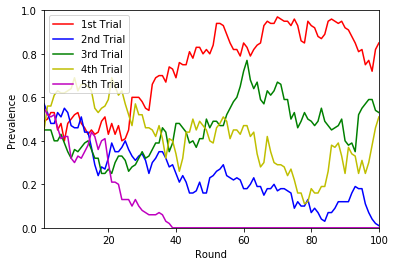

In [363]:
param_dict = {'size': 100,
              'prior': 0.5,
              'edge_prob': 0.1,
              'memory': 0.0,
              'rounds': 100}

display_five_simulations(param_dict)

## Visualizing Dispersion
To better understand the trends in behavioral dispersion which occur under different parameter settings, we conduct numerous simulations and display the proportion of trials for which the prevalence falls into each of 5 quintiles (with 0% and 100% excluded). We also display the proportion of trials where one of the behaviors reaches saturation.

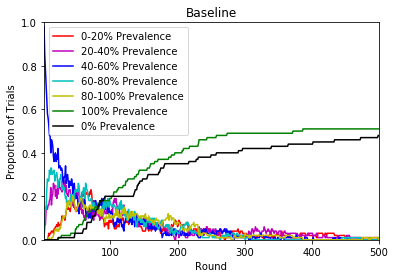

In [158]:
param_dict = {'size': 100,
              'prior': 0.5,
              'edge_prob': 0.1,
              'memory': 0.0,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Baseline')

## Adjusting Initial Prevalence
The prior parameter represents the initial prevalence of the target variable. Functionally, it controls the probability that an agent will exhibit the target behavior in round one. In any subsequent round, agents will act according to the distribution of action exhibited in their reference network in the previous round. We fix memory at zero for these simulations, so there is no mixing between old priors and new observations. If prior is zero, the target behavior will never be introduced. If prior is one, base behavior is nonexistent. 

We visualize our results for prior values of 0.1, 0.3, and 0.5. The extremal values (0.0, 1.0) result in flat lines at 0% or 100% respectively, as only a single behavior is ever present. We maintain the baseline parameters for population (100), connectivity (10%), and memory (0). We conduct 100 trials of 500 rounds each for the chosen prior values.

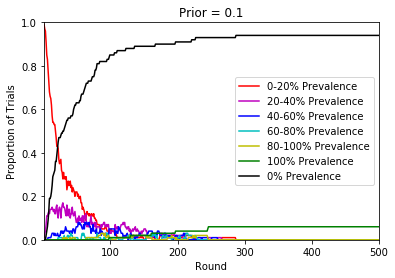

In [356]:
param_dict = {'size': 100,
              'prior': 0.1,
              'edge_prob': 0.1,
              'memory': 0.0,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Prior = 0.1')

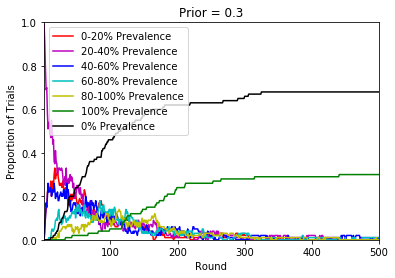

In [355]:
param_dict = {'size': 100,
              'prior': 0.3,
              'edge_prob': 0.1,
              'memory': 0.0,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Prior = 0.3')

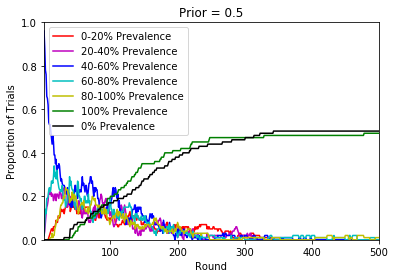

In [164]:
param_dict = {'size': 100,
              'prior': 0.5,
              'edge_prob': 0.1,
              'memory': 0.0,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Prior = 0.5')

The simulations with prior $p$ and $(1 - p)$ are effectively symmetric for any $p$. Quite interestingly, the proportion of simulations where full prevalence is reached appears to track the value of the prior parameter remarkably closely. Further simulations verified this general trend up to prior values of 0.95. We will later explore how this changes under different parameter settings.

## Adjusting Population Size
We conduct simulations with varying population sizes to observe the effect of population on speed of convergence. We conducted simulations for a range of values and show our results for networks with 25, 100, and 250 agents. It appears that convergence (either to the base or target action) is not guaranteed for populations under 50, and these smaller populations exhibit higher volatility per round as seen by the amount of noise in the prevalence graphs. The speed of convergence appears to slow down gradually as network size grows, yet it still occurs eventually nonetheless. The lack of convergence in smaller networks may be a result of a disconnected network. Because we did not modify our edge probability, it is possible that separate components of the network each converge on their own to different actions, but there is no network-wide dominant action.

For these simulations we maintain the baseline parameters for connectivity (10%), starting prior (50%), and memory (0). We conduct 100 trials for 500 rounds each.

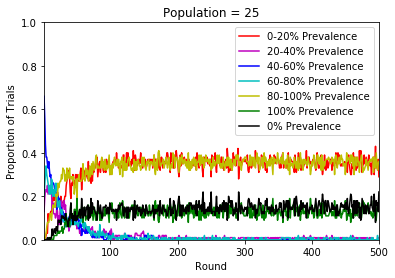

In [172]:
param_dict = {'size': 25,
              'prior': 0.5,
              'edge_prob': 0.1,
              'memory': 0.0,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Population = 25')

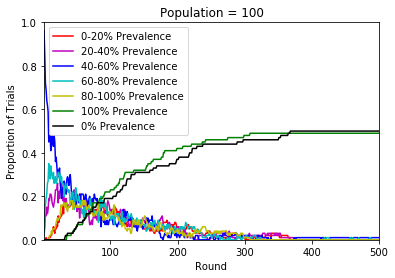

In [175]:
param_dict = {'size': 100,
              'prior': 0.5,
              'edge_prob': 0.1,
              'memory': 0.0,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Population = 100')

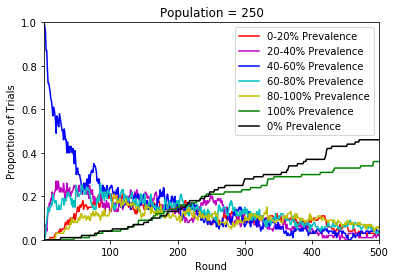

In [179]:
param_dict = {'size': 250,
              'prior': 0.5,
              'edge_prob': 0.1,
              'memory': 0.0,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Population = 250')

## Adjusting Connectivity
The networks we are constructing are random, where any undirected edge between two agents is included with some fixed probability. We explore the effects of changing this probability on the dispersion of the target action. We simulate with many values and show our results for connectivity of 0.025, 0.05, 0.1, and 0.25.

Low connectivity appears to have similar results to very small networks, likely due to the same problem of a disconnected network. Connectivity values beyond 0.1 do not seem to have a strong impact on prevalence.

For these simulations we maintain the baseline parameters for size (100), starting prior (50%), and memory (0). We conduct 100 trials for 500 rounds each.

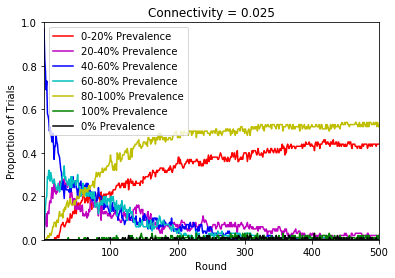

In [191]:
param_dict = {'size': 100,
              'prior': 0.5,
              'edge_prob': 0.025,
              'memory': 0.1,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Connectivity = 0.025')

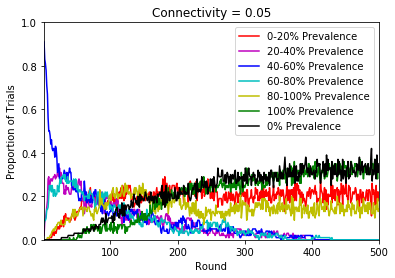

In [192]:
param_dict = {'size': 100,
              'prior': 0.5,
              'edge_prob': 0.05,
              'memory': 0.1,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Connectivity = 0.05')

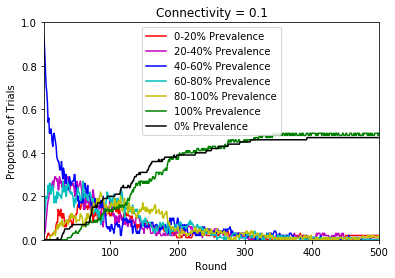

In [193]:
param_dict = {'size': 100,
              'prior': 0.5,
              'edge_prob': 0.1,
              'memory': 0.1,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Connectivity = 0.1')

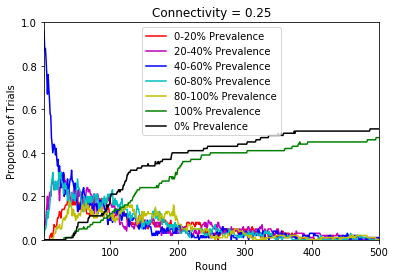

In [364]:
param_dict = {'size': 100,
              'prior': 0.5,
              'edge_prob': 0.25,
              'memory': 0.1,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Connectivity = 0.25')

## Adjusting Memory
The memory parameter controls the speed at which an agent learns from its neighbors. More concretely, memory controls the mixture between the old prior and the observed distribution when updating an agent's prior. If memory is 0, the prior will always be set to the observed distribution in the previous round. If memory is 1, the prior will never update.

As we can see from the visualizations below for memory values of 0.3, 0.5, and 0.7, increasing memory appears to decrease the speed at which behaviors disperse, resulting higher proportions of trials falling into the middle prevalence bands for longer periods of time. For memory values above 0.7, the proportion of trials for which one of the behaviors reaches convergence in 500 rounds becomes quite small, but simulations with longer time horizons confirmed that convergence will usually occur eventually. As expected, when memory is set to 1, we found no change in behavior over time, with nearly every trial falling into the middle band. These results are not entirely surprising, but they allow us to represent an important behavioral phenomenon. When agents are less willing to adapt to new observations, favoring what they already know, new behaviors face more resistance. We will later see how this interacts with other behaviors.

We maintain the baseline parameters for population (100), connectivity (10%), and starting prior (50%). We conduct 100 trials for 500 rounds each.

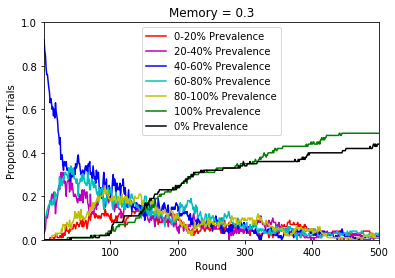

In [365]:
param_dict = {'size': 100,
              'prior': 0.5,
              'edge_prob': 0.1,
              'memory': 0.3,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Memory = 0.3')

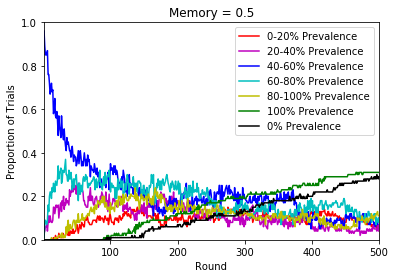

In [184]:
param_dict = {'size': 100,
              'prior': 0.5,
              'edge_prob': 0.1,
              'memory': 0.5,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Memory = 0.5')

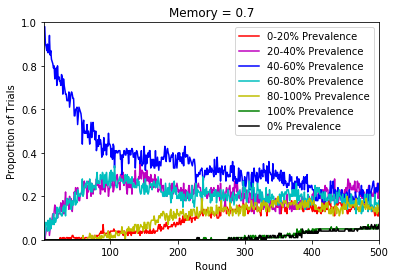

In [186]:
param_dict = {'size': 100,
              'prior': 0.5,
              'edge_prob': 0.1,
              'memory': 0.7,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Memory = 0.7')

## Connectivity and Initial Prevalence
As we saw in our simulations where we modified the prior value for initial prevalence, the proportion of rounds where the target action reached saturation was strongly correlated with the prior value chosen. We aim to understand whether this is a general phenomenon or simply a coincidence caused by our baseline parameters. Due to symmetry between the two actions, we only explore prior values below 0.5. We increase the connectivity for networks with prior values of 0.1 and 0.3.

Again it appears that for both lower values for the prior, prevalence of the target behavior is often much lower until a certain connectivity threshold is reached (roughly 0.075). For all connectivity levels beyond this, saturation of the target behavior appears to occur with probability quite similar to the prior (0.1 or 0.3). Even in a fully connected network, the probability of convergence to the target behavior tracks the initial prior with remarkable precision.

We maintain the baseline parameters for memory (0) and starting prior (50%). We conduct 100 trials for 500 rounds each. For our simulation on fully connected networks, we limit the size to 50. 

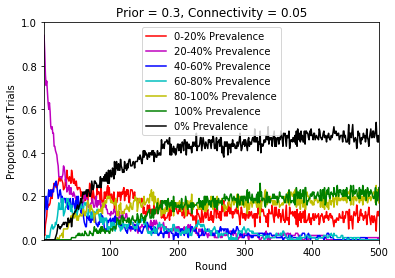

In [367]:
param_dict = {'size': 100,
              'prior': 0.3,
              'edge_prob': 0.05,
              'memory': 0.0,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Prior = 0.3, Connectivity = 0.05')

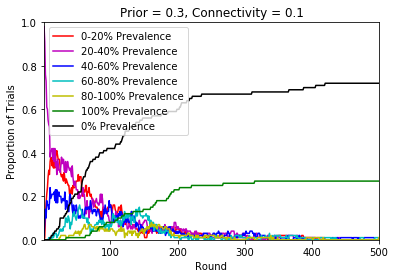

In [205]:
param_dict = {'size': 100,
              'prior': 0.3,
              'edge_prob': 0.1,
              'memory': 0.0,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Prior = 0.3, Connectivity = 0.1')

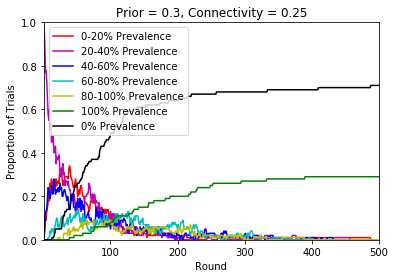

In [208]:
param_dict = {'size': 100,
              'prior': 0.3,
              'edge_prob': 0.25,
              'memory': 0.0,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Prior = 0.3, Connectivity = 0.25')

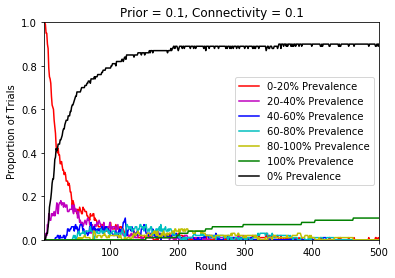

In [371]:
param_dict = {'size': 100,
              'prior': 0.1,
              'edge_prob': 0.1,
              'memory': 0.0,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Prior = 0.1, Connectivity = 0.1')

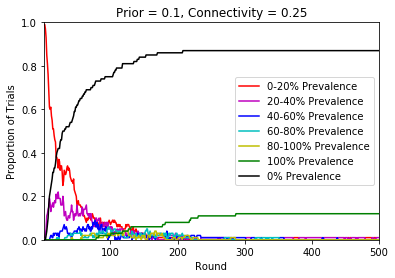

In [366]:
param_dict = {'size': 100,
              'prior': 0.1,
              'edge_prob': 0.25,
              'memory': 0.0,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Prior = 0.1, Connectivity = 0.25')

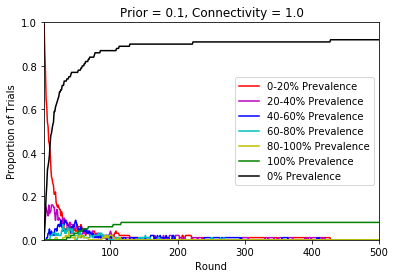

In [369]:
param_dict = {'size': 50,
              'prior': 0.1,
              'edge_prob': 1.0,
              'memory': 0.0,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Prior = 0.1, Connectivity = 1.0')

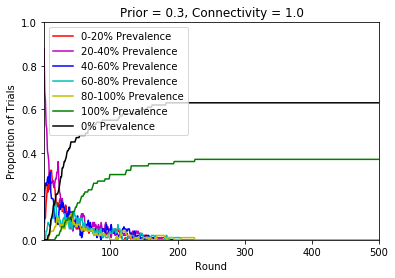

In [370]:
param_dict = {'size': 50,
              'prior': 0.3,
              'edge_prob': 1.0,
              'memory': 0.0,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Prior = 0.3, Connectivity = 1.0')

## Memory and Initial Prevalence

We also consider the tradeoff between memory and prior. Due to symmetry between the two actions, we only explore prior values below 0.5. We vary the memory for networks with prior values of 0.1 and 0.3. Again, we find that the dominant effect of increasing memory seems to be simply slowing down the process of convergence. The phenomenon of the prior determining the likelihood of convergence appears to be consistent. Baseline values were maintained for the remaining parameters, with the exception of increasing the time horizon when memory is 0.5. 

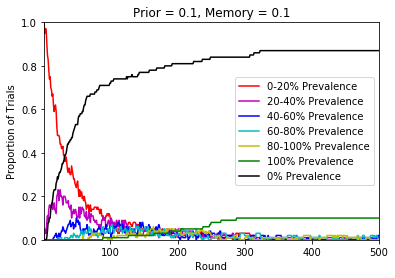

In [227]:
param_dict = {'size': 100,
              'prior': 0.1,
              'edge_prob': 0.1,
              'memory': 0.1,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Prior = 0.1, Memory = 0.1')

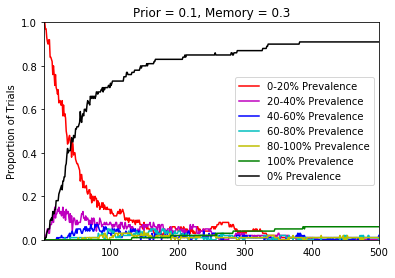

In [228]:
param_dict = {'size': 100,
              'prior': 0.1,
              'edge_prob': 0.1,
              'memory': 0.3,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Prior = 0.1, Memory = 0.3')

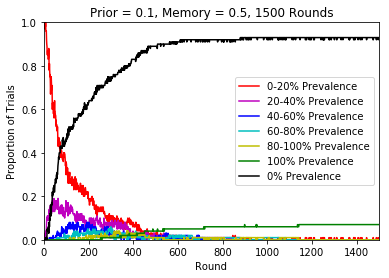

In [373]:
param_dict = {'size': 100,
              'prior': 0.1,
              'edge_prob': 0.1,
              'memory': 0.5,
              'rounds': 1500,
              'trials': 100}

visualize_proportions(param_dict, 'Prior = 0.1, Memory = 0.5, 1500 Rounds')

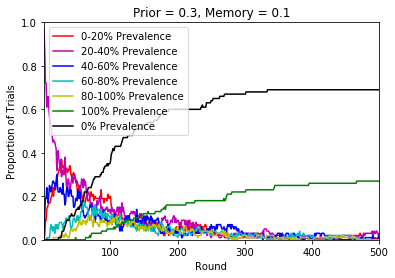

In [237]:
param_dict = {'size': 100,
              'prior': 0.3,
              'edge_prob': 0.1,
              'memory': 0.1,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Prior = 0.3, Memory = 0.1')

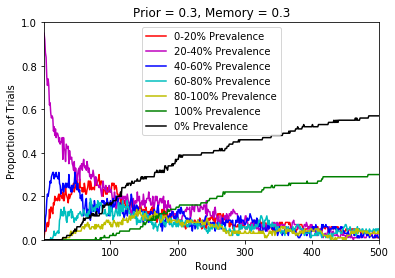

In [238]:
param_dict = {'size': 100,
              'prior': 0.3,
              'edge_prob': 0.1,
              'memory': 0.3,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'Prior = 0.3, Memory = 0.3')

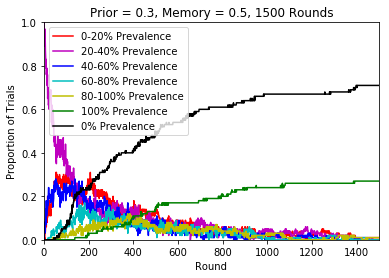

In [372]:
param_dict = {'size': 100,
              'prior': 0.3,
              'edge_prob': 0.1,
              'memory': 0.5,
              'rounds': 1500,
              'trials': 100}

visualize_proportions(param_dict, 'Prior = 0.3, Memory = 0.5, 1500 Rounds')

## Clusters
Creating clusters in the graph does not appear to drastically affect convergence. Upon normalizing the likelihoods to result in similar numbers of edges in the network, we find similar patterns of convergence in networks of size 100 with 4, 10, and 20 clusters (baseline parameters for prior and memory). We will further investigate the interaction between clustering and the location of trendsetters in networks.

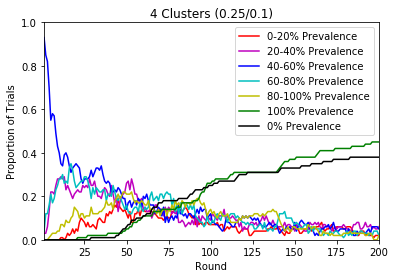

In [410]:
param_dict = {'size': 100,
              'prior': 0.5,
              'memory': 0.0,
              'rounds': 200,
              'trials': 100,
              'clusters': 4,
              'ingroup': 0.25,
              'outgroup': 0.1}

# Approx. 1000 edges
visualize_proportions(param_dict, '4 Clusters (0.25/0.1)')

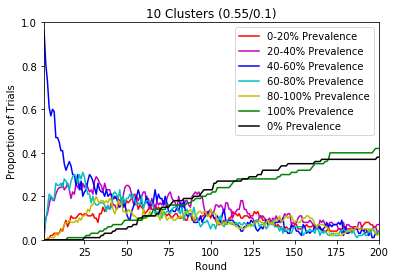

In [413]:
param_dict = {'size': 100,
              'prior': 0.5,
              'memory': 0.0,
              'rounds': 200,
              'trials': 100,
              'clusters': 10,
              'ingroup': 0.55,
              'outgroup': 0.1}

# Approx. 1000 edges
visualize_proportions(param_dict, '10 Clusters (0.55/0.1)')

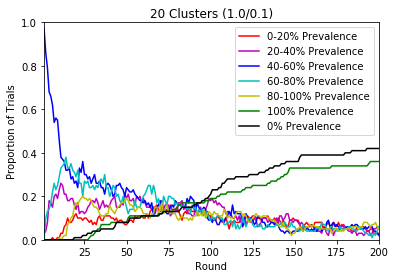

In [412]:
param_dict = {'size': 100,
              'prior': 0.5,
              'memory': 0.0,
              'rounds': 200,
              'trials': 100,
              'clusters': 20,
              'ingroup': 1.0,
              'outgroup': 0.1}

# Approx. 975 edges
visualize_proportions(param_dict, '20 Clusters (1.0/0.1)')

## Trendsetters

We are now ready to address the questions regarding the trendsetting portion of this project. First we introduce the notion of a trendsetter, which we treat as an agent who aims to make the target behavior reach convergence in the network. They influence those in their surrounding network by consistently using the target behavior, so their prior is set to 1 in every round. 

We begin by demonstrating the surprising effectiveness of a single trendsetter in a network where no one else is using the target behavior. We set the prior to 0 and keep the remaining parameters at baseline values. Nearly every simulation converged to the target behavior in 500 rounds, with half of them converging in under 200 rounds. With 5 trendsetters, all simulations converged in under 200 rounds.

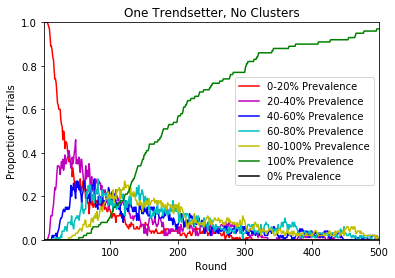

In [415]:
param_dict = {'size': 100,
              'prior': 0.0,
              'edge_prob': 0.1,
              'memory': 0.0,
              'rounds': 500,
              'trials': 100,
              'trendsetters': [0]}

visualize_proportions(param_dict, 'One Trendsetter, No Clusters')

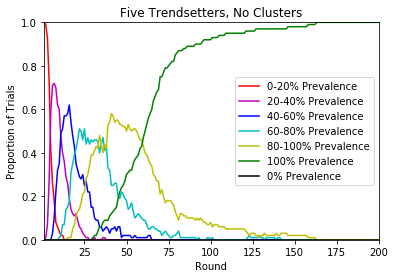

In [418]:
param_dict = {'size': 100,
              'prior': 0.0,
              'edge_prob': 0.1,
              'memory': 0.0,
              'rounds': 200,
              'trials': 100,
              'trendsetters': [0,1,2,3,4]}

visualize_proportions(param_dict, 'Five Trendsetters, No Clusters')

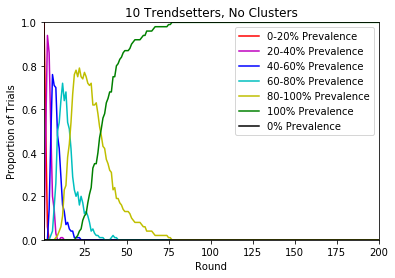

In [445]:
param_dict = {'size': 100,
              'prior': 0.0,
              'edge_prob': 0.1,
              'memory': 0.0,
              'rounds': 200,
              'trials': 100,
              'trendsetters': [0,1,2,3,4,5,6,7,8,9]}

visualize_proportions(param_dict, '10 Trendsetters, No Clusters')

## Trendsetters in Clusters

Most real-world networks are not uniformly random and exhibit some degree of clustering. An important question to answer when considering the efficacy of trendsetting is the allocation of resources across a network topology. To investigate this, we consider networks with 10 trendsetters and 10 clusters, and conduct simulations with different allocations of the trendsetters between clusters. We show our results for the case when all are in the same cluster, spread between 2 clusters, spread between 5 clusters, and spread between all 10 clusters. Each of our clusters is completely connected, with 10% connectivity between clusters, no prior, and no memory. The differences between the results are subtle, but we find that placing all trendsetters in the same cluster is the least efficient allocation. Examining the cascading changes between the different frequency bands is helpful for understanding these patterns. Notably, the 40-60% band diminishes fastest in the 5-cluster and 10-cluster simulations, followed by the 2-cluster. Examining the round threshold beyond which more than half of the simulations have converged is useful as well. The 2-cluster simulation improves beyond the single cluster, and the 5-cluster simulation shows an improvement as well, but it is more difficult to discern a further improvement from the 10-cluster simulation.

We also include memory values of 0.3 in simulations with 5 trendsetters, and find again that spreading trendsetters apart is more effective than keeping them together in a cluster.

These results suggest that dispersion of trendsetters across a network may be an effective strategy, particularly for relatively small networks whose members exhibit copying behavior similar to our model. It is difficult to comment on whether the strategy of dispersing trendsetters will work for much larger networks, as the trendsetters in our simulation are still fairly close in terms of degrees of separation, even if they are in different clusters.

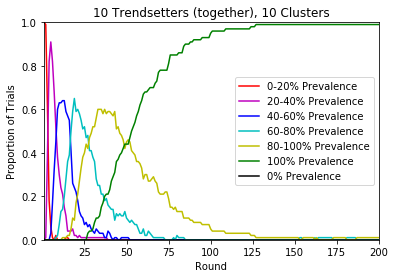

In [441]:
param_dict = {'size': 100,
              'prior': 0.0,
              'memory': 0.0,
              'rounds': 200,
              'trials': 100,
              'clusters': 10,
              'ingroup': 1.0,
              'outgroup': 0.1,
              'trendsetters': [0,1,2,3,4,5,6,7,8,9]}

visualize_proportions(param_dict, '10 Trendsetters (together), 10 Clusters')

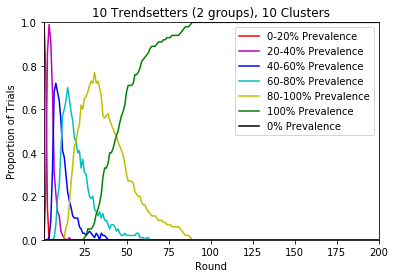

In [446]:
param_dict = {'size': 100,
              'prior': 0.0,
              'memory': 0.0,
              'rounds': 200,
              'trials': 100,
              'clusters': 10,
              'ingroup': 1.0,
              'outgroup': 0.1,
              'trendsetters': [0,1,2,3,4,10,11,12,13,14]}

visualize_proportions(param_dict, '10 Trendsetters (2 groups), 10 Clusters')

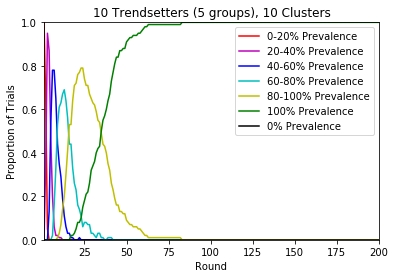

In [442]:
param_dict = {'size': 100,
              'prior': 0.0,
              'memory': 0.0,
              'rounds': 200,
              'trials': 100,
              'clusters': 10,
              'ingroup': 1.0,
              'outgroup': 0.1,
              'trendsetters': [0,1,10,11,20,21,30,31,40,41]}

visualize_proportions(param_dict, '10 Trendsetters (5 groups), 10 Clusters')

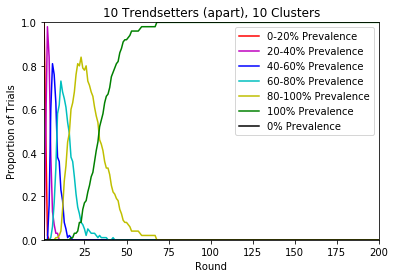

In [447]:
param_dict = {'size': 100,
              'prior': 0.0,
              'memory': 0.0,
              'rounds': 200,
              'trials': 100,
              'clusters': 10,
              'ingroup': 1.0,
              'outgroup': 0.1,
              'trendsetters': [0,5,10,15,20,25,30,35,40,45]}

visualize_proportions(param_dict, '10 Trendsetters (apart), 10 Clusters')

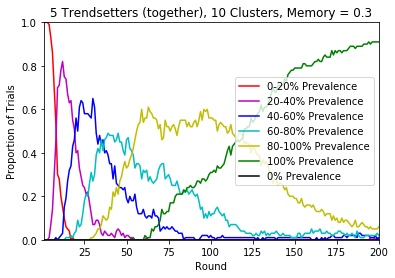

In [433]:
param_dict = {'size': 100,
              'prior': 0.0,
              'memory': 0.3,
              'rounds': 200,
              'trials': 100,
              'clusters': 10,
              'ingroup': 1.0,
              'outgroup': 0.1,
              'trendsetters': [0,1,2,3,4]}

visualize_proportions(param_dict, '5 Trendsetters (together), 10 Clusters, Memory = 0.3')

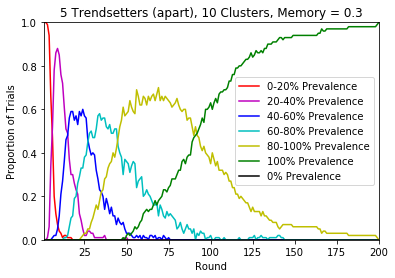

In [448]:
param_dict = {'size': 100,
              'prior': 0.0,
              'memory': 0.3,
              'rounds': 200,
              'trials': 100,
              'clusters': 10,
              'ingroup': 1.0,
              'outgroup': 0.1,
              'trendsetters': [0,10,20,30,40]}

visualize_proportions(param_dict, '5 Trendsetters (apart), 10 Clusters, Memory = 0.3')

## Trendsetters and Initial Prevalence

We also see that introducing a trendsetter into a network can have a powerful boosting effect on the existing prior. With a prior of 0.3, the likelihood of convergence to the target behavior is roughly 0.3 as described earlier when no trendsetters are present, but the inclusion of one trendsetter results in nearly every simulation converging to the target. 

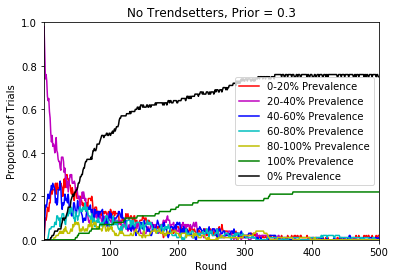

In [439]:
param_dict = {'size': 100,
              'prior': 0.3,
              'edge_prob': 0.1,
              'memory': 0.0,
              'rounds': 500,
              'trials': 100}

visualize_proportions(param_dict, 'No Trendsetters, Prior = 0.3')

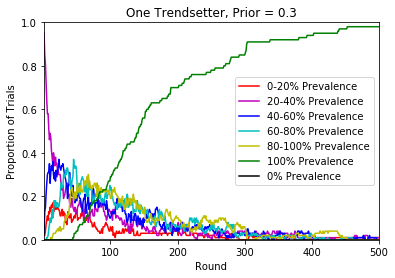

In [438]:
param_dict = {'size': 100,
              'prior': 0.3,
              'edge_prob': 0.1,
              'memory': 0.0,
              'rounds': 500,
              'trials': 100,
              'trendsetters': [0]}

visualize_proportions(param_dict, 'One Trendsetter, Prior = 0.3')

## Drawing Conclusions About Trendsetting

While our simulations involving trendsetters provide strong evidence that small groups of individuals can have powerful effects in a network, we should keep in mind the limitations of our model when interpreting these results. We should recall that in nearly every experiment we ran, each simulation converged to one of the two behaviors eventually, even if some took longer than others. Due to the way in which agents update their priors, it is highly unlikely that a network will persist in equilibrium with both actions, because a slight fluctuation in the direction of one behavior can set off a cascade of copying resulting in convergence. Keeping this in mind, we also know that when even a single trendsetter is present, the network will never fully converge to the base action because that one trendsetter will never adopt it. Thus, we should not be too surprised that essentially every simulation converges to the target behavior when trendsetters are included. 

A more realistic variant of the model, which has less of a convergence guarantee, would be to introduce a mortality rate for agents. This was a prominent feature of the simulations done by Nunn et al. which we discussed previously. Another approach would be to weaken the prior for trendsetters, or to allow them to be influenced to some degree.

While we do not explicitly simulate the case where trendsetters eventually cease trendsetting, our previous results about priors and probability of convergence are useful here for speculating about what might happen. We have seen that when trendsetters are not present, there is a close connection between the initial prior values and the likelihood that the target behavior will reach prevalence. If we take the prior as a representation of the proportion of agents who are engaging in the target behavior, which is the case in expectation in the first round, we can predict what will occur trendsetter were to drop out of the network. The network without trendsetters at this stage would appear quite similar to a network with the prior set to the current prevalence, and thus we would expect convergence to occur with probability roughly equal to the prevalence upon trendsetter dropout. In our simulation with five trendsetters and no clusters, after about 20 rounds the mean prevalence appears to be approximately 50%. This suggests that if the trendsetters were to drop out at this round, or at least stop overriding the prior updating process, convergence to the target would likely occur about half the time.

## Running Additional Simulations

Running the cell below will simulate behavior in a network according to the specified parameters. The 'trendsetters' field can be removed. If 'clusters' is included, 'edge_prob' will have no effect, because 'ingroup' and 'outgroup' will control the likelihood for all edges. The 'clusters' field can be removed, and 'edge_prob' will dictate the inclusion probability for all edges. 

In [ ]:
param_dict = {'size': 100,
              'prior': 0.0,
              'edge_prob': 0.1
              'memory': 0.0,
              'rounds': 500,
              'trials': 100,
              'clusters': 10,
              'ingroup': 1,
              'outgroup': 0.2,
              'trendsetters': [0]}

visualize_proportions(param_dict, 'Plot Title')